# Stage 1

# **1. Intro**

신용카드 사기 거래 탐지 AI 경진대회에 오신 데이커 여러분 모두 환영합니다!

데이커분들은 신용카드 몇장 갖고 있나요? 

한국은행에서 발표한 '2017년 지급수단 이용행태 조사결과'에 따르면, 1인당 평균 신용카드 보유장수는 2.1장, 보유 비율 57.9%로 지급수단 선호도 1위를 차지했는데요.

선호도가 높은 만큼 피싱 사기가 진화하면서 정상 거래로 위장한 신종 사기 수법까지 나타나고 있습니다.
 이에 대한 어떤 해결법이 있을까요?

<p style='text-align: right;'>

# **2. 프로젝트 배경**

![image.png](https://img.etnews.com/photonews/1712/1027344_20171222123145_398_0001.jpg)

당신이 잠들고 있는 사이, 본인 명의의 신용카드로 수백만원이 결제되는 상상해본적 있으신가요?

사회초년생이라면 누구나 신용카드 하나씩 갖고 있을텐데요. 무이자 할부 기능, 백화점 및 통신사 등의 할인 혜택으로 우리의 통장을 텅장으로 만들지만, 우리 삶에 엄청난 편리함을 제공해주고 있죠! 

이런 신용카드의 편리함 이면에는 범죄의 어두운 그림자가 함께 하고 있습니다. 2022년 9월 한국경제 취재를 종합하면 현대카드 소비자 9명은 지난 7월 쿠팡·11번가·텐바이텐·옥션·지마켓 등 온라인 쇼핑몰에서 본인도 모르는 사이 신용카드로 수백만 원이 결제됐다며 현대카드와 금감원에 민원을 제기했다고 합니다. 카드사 측이 확인한 피해금액은 무려 약 5000만원이었는데요.

우리 삶에 밀접한 만큼 소중히 다뤄야하는 신용카드!

부정 사용 사고를 줄이기 위한 사기성 신용카드 거래를 탐지하고, 고객의 카드가 부정사용이 발생하지 않도록 하는 AI 모델을 개발하는 방법으로 효과적으로 해결할 수 있습니다.

현대인의 삶에 필수템인 신용카드의 사기 거래 문제를 개선할 수 있는 AI 모델 개발을 6개의 stage를 통해 단계별로 학습하면서 사기 거래를 탐지해봅시다!

# **3. 데이터 살펴보기**

## **3-1. 데이터 불러오기**
(*이번 프로젝트에서는 JupyterLite를 기준으로 설명합니다.*)

AI 모델을 개발하기 위해 가장 먼저 해야 할 일이 무엇일까요?

바로 데이터를 살펴보는 일입니다. 주어진 데이터를 살펴보며 데이터의 모양과 대략적인 내용을 파악하고, 어떤 분석이 가능한지 확인하여 방향을 잡는 과정이 필요합니다.

이번 프로젝트에서 사용할 데이터는 모두 csv파일로 **총 4가지**입니다.</br>
\* *csv 파일은 Comma-Separated Values의 약자로 필드를 쉼표로 구분한 텍스트 파일입니다.*
      
      1. train.csv: AI 모델을 학습(train)하기 위해 사용하는 데이터 
      2. val.csv: 학습이 된 여러 가지 모델 중 가장 좋은 하나의 모델을 고르기 위한 데이터
      3. test.csv: AI 모델을 통해 정답을 예측하기 위해 사용하는 데이터
      4. sample_submission.csv: 예측한 정답 값을 기록하여 제출하기 위한 샘플 정답 파일


이제 데이터를 불러오는 법을 알아보겠습니다.


1. 사용할 데이터를 먼저 다운로드 합니다.
저희는 신용카드 사기 거래 탐지 AI 경진대회의 데이터를 활용할 것으로 아래의 링크에서 다운받아 줍니다.
https://dacon.io/competitions/official/235930/data


2. 다운받은 데이터 파일을 JupyterLite에 업로드 해줍니다.
(해당 자료에서는 ipynb 파일과 동일한 위치에 업로드했습니다)


3. Pandas 라이브러리를 통해 데이터 불러오기
위의 4가지 데이터는 Python의 **Pandas 라이브러리**를 통해 데이터를 살펴 볼 수 있는데요.</br>
Pandas 라이브러리를 통해 csv파일을 DataFrame 형식으로 바꾸어 데이터를 다룰 수 있습니다.
csv파일을 불러올 땐 read_csv()함수를 사용해 줍니다.

In [1]:
# Pandas라이브러리를 불러오기 위해서는 import를 사용합니다.
# as는 alias의 약자로 앞으로의 코드에서 pandas를 별칭(pd)으로 부르고 싶을 때 사용합니다.
import pandas as pd 
train = pd.read_csv('/home/iai/heo/credit/train.csv')
train 

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


### Q. 그럼 나머지 데이터들도 불러와 볼까요?

- val 변수에 'val.csv' 파일 불러오기
- test 변수에 'test.csv' 파일 불러오기
- submission 변수에 'sample_submission.csv' 파일 불러오기

### Hint.
파일이 잘 불러와지지 않는다면 데이터 파일의 위치와 현재 코드가 실행되고 있는 파일(.ipynb)의 위치를 잘 확인해 보세요!

### Solution

In [2]:
val = pd.read_csv('/home/iai/heo/credit/val.csv')
test = pd.read_csv('/home/iai/heo/credit/test.csv')
submission = pd.read_csv('/home/iai/heo/credit/sample_submission.csv')

## 3-2. 데이터 확인하기

이제 데이터가 잘 불러왔는지 확인하고, 불러온 데이터의 정보와 결측치는 없는지 확인해 보겠스빈다.

이때, pandas의 head(), tail(), info()를 사용하여 확인해보겠습니다.
- head() : 불러온 데이터의 상위 5개의 행 출력
- tail() : 불러온 데이터의 하위 5개의 행 출력
- info() : 불러온 데이터의 정보(필드명, 필드들의 타입 등), 결측치 확인

In [3]:
# train 데이터 상위 5개의 행 출력
train.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [4]:
# train 데이터의 하위 5개의 행 출력
train.tail()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939
113841,284803,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,1.034951


In [5]:
# train 데이터의 정보 및 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113842 entries, 0 to 113841
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      113842 non-null  int64  
 1   V1      113842 non-null  float64
 2   V2      113842 non-null  float64
 3   V3      113842 non-null  float64
 4   V4      113842 non-null  float64
 5   V5      113842 non-null  float64
 6   V6      113842 non-null  float64
 7   V7      113842 non-null  float64
 8   V8      113842 non-null  float64
 9   V9      113842 non-null  float64
 10  V10     113842 non-null  float64
 11  V11     113842 non-null  float64
 12  V12     113842 non-null  float64
 13  V13     113842 non-null  float64
 14  V14     113842 non-null  float64
 15  V15     113842 non-null  float64
 16  V16     113842 non-null  float64
 17  V17     113842 non-null  float64
 18  V18     113842 non-null  float64
 19  V19     113842 non-null  float64
 20  V20     113842 non-null  float64
 21  V21     11

### Q. 이제 나머지 데이터들도 직접 확인해 보세요!

- val, test 각각의 변수들의 상위 5개의 데이터, 하위 5개의 데이터, 정보 및 결측치 확인해보세요.
- 추가로 상위 10개의 데이터도 확인해 보세요.

### Hint.
head(), tail()의 default 값이 5입니다.

### Solution

In [6]:
val.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


In [7]:
val.tail()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
28457,284769,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,...,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622,0
28458,284779,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,...,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693,0
28459,284790,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763,0
28460,284801,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928,0
28461,284806,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,1.034975,0


In [8]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28462 entries, 0 to 28461
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      28462 non-null  int64  
 1   V1      28462 non-null  float64
 2   V2      28462 non-null  float64
 3   V3      28462 non-null  float64
 4   V4      28462 non-null  float64
 5   V5      28462 non-null  float64
 6   V6      28462 non-null  float64
 7   V7      28462 non-null  float64
 8   V8      28462 non-null  float64
 9   V9      28462 non-null  float64
 10  V10     28462 non-null  float64
 11  V11     28462 non-null  float64
 12  V12     28462 non-null  float64
 13  V13     28462 non-null  float64
 14  V14     28462 non-null  float64
 15  V15     28462 non-null  float64
 16  V16     28462 non-null  float64
 17  V17     28462 non-null  float64
 18  V18     28462 non-null  float64
 19  V19     28462 non-null  float64
 20  V20     28462 non-null  float64
 21  V21     28462 non-null  float64
 22

In [9]:
test.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [10]:
test.tail()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
142498,0x4587f,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,0.028645,1.034904
142499,0x45880,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,0.810312,1.034916
142500,0x45884,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,1.034963
142501,0x45885,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,1.034975
142502,0x45887,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,1.035022


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142503 entries, 0 to 142502
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      142503 non-null  object 
 1   V1      142503 non-null  float64
 2   V2      142503 non-null  float64
 3   V3      142503 non-null  float64
 4   V4      142503 non-null  float64
 5   V5      142503 non-null  float64
 6   V6      142503 non-null  float64
 7   V7      142503 non-null  float64
 8   V8      142503 non-null  float64
 9   V9      142503 non-null  float64
 10  V10     142503 non-null  float64
 11  V11     142503 non-null  float64
 12  V12     142503 non-null  float64
 13  V13     142503 non-null  float64
 14  V14     142503 non-null  float64
 15  V15     142503 non-null  float64
 16  V16     142503 non-null  float64
 17  V17     142503 non-null  float64
 18  V18     142503 non-null  float64
 19  V19     142503 non-null  float64
 20  V20     142503 non-null  float64
 21  V21     14

In [12]:
# 상위 10개의 데이터 출력하기
train.head(10)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
5,11,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,-0.198421,-0.994866
6,14,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,0.076853,-0.994854
7,15,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,0.514218,-0.994843
8,16,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,-0.083980,-0.994843
9,18,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,-0.665271,...,-0.194796,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,-0.294977,-0.994831


# 4. 제출 준비하기

지금까지 데이터를 제대로 불러왔으면 저장하는 법도 제대로 알아야겠죠?

기본적으로 ".to_csv" 메소드는 데이터프레임(ex. submission) 객체의 내용을 csv 파일 형태로 만들어 저장해 주는 기능입니다. </br>
이렇게 해야 파이썬 안에서 작업한 내용이 파이썬 밖으로 빠져나가 여러분이 만질 수 있는 형태가 되는 거죠. </br>
이처럼 파일을 불러서 처리한 후, 저장하는 일련의 과정을 "데이터 i/o(input/output)를 처리한다" 라고 합니다. </br> 

to_csv() 함수에서 가장 많이 사용하는 옵션은 두가지 있습니다.

    - sep : 데이터들을 구분할 때 구분자를 설정하는 것입니다. default 값은 ','로 설정되어 있고, 원하는 형태로 설정 가능합니다.
    - index : 데이터들의 index 사용 여부를 결정합니다. True, False로 default 값은 True입니다.

to_csv 메소드를 이용하여 submission 객체의 내용을 csv 파일 형태로 만들어 주고,   
추가적인 인덱스 설정없이 index=False를 하겠습니다.
(정확한 채점을 위해서는 index=False를 꼭 넣어 주어야 합니다)

In [13]:
submission.to_csv('submission',sep=',', index=False)

# Stage 2

이번 Stage2에서는 데이터 분석 및 모델링에 앞서서 데이터 전처리 과정을 진행할려고 합니다. 

데이터 전처리 과정에서는 결측치 제거와 데이터 표준화 그리고 데이터에서 필요없는 칼럼을 없애는 작업을 진행할 것입니다. 

## 1. 결측치 제거하기

데이터에 있는 결측치를 다루는 법은 크게 세 가지 방법이 있습니다.

- 결측치를 제거한다.

- 결측치를 0으로 바꾸어준다.

- 결측치를 중앙값 또는 평균으로 바꾸어준다.

In [14]:
train.isnull().sum()

ID     0
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
dtype: int64

결측치가 다행히도 train 데이터에는 존재하지 않는 것을 확인할 수 있었습니다.

## 2. 데이터 표준화

데이터 변수 V1, V2, V3,...., V30까지의 변수들은 각각 단위가 다를 것입니다. 이 변수들의 단위를 맞추어 주기 위해 

StandardScaler() 함수를 이용하여 train data, val data, test data의 변수들의 단위들을 맞추어 주도록 하겠습니다. 


In [15]:
train

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [16]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler() 

# 데이터 표준화하기 전에 아무 의미 없는 열 ID 칼럼 제거하기 
 
train=train.drop(['ID'],axis=1)
val=val.drop(['ID'],axis=1)
test=test.drop(['ID'],axis=1)

train_df=scaler.fit_transform(train)
train_df=pd.DataFrame(train_df,columns=train.columns)
val_df=scaler.transform(val.drop(columns=['Class']))
val_columns=val.columns[:-1]
val_df=pd.DataFrame(val_df,columns=val_columns)
val_df['Class']=val['Class']

test_df=scaler.transform(test)
test_df=pd.DataFrame(test_df,columns=test.columns)




## 3. 데이터 분포를 통해 필요없는 칼럼 삭제하기

현재 학습데이터에는 클래스(Class)가 없고 검증 데이터에는 클래스(Class)가 있다. 따라서 검증 데이터를 이용하여 

Class별 각 변수들의 분포도를 구한다. 각 변수들의 분포도를 통해서 Class(정상/사기)를 잘 구별해주는 변수들을 찾고

아닌 변수들은 제거한다.
 
- 파란색 : 정상 거래 Validation Data

- 주황색 : 사기 겨래 Validation Data 


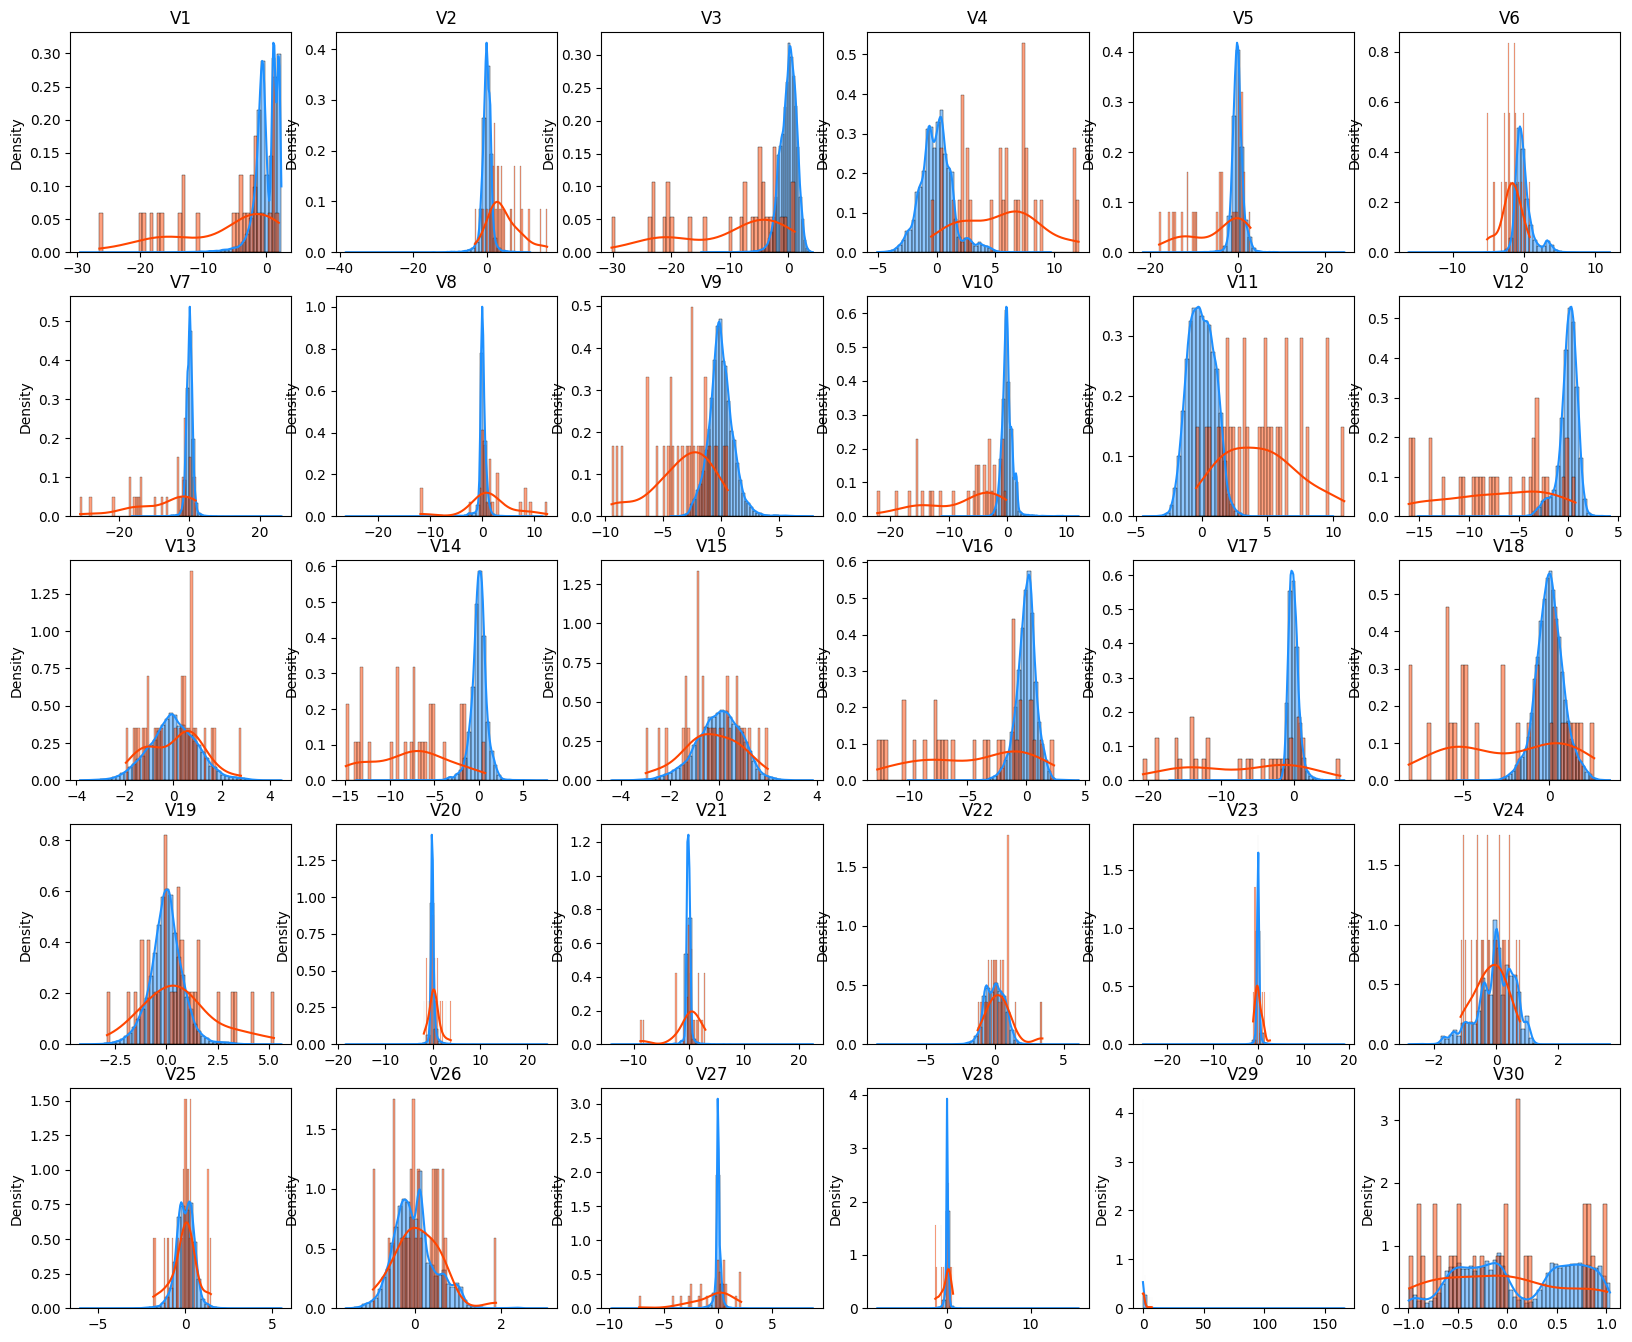

In [17]:
val_class0 = val[val['Class']==0]
val_class1 = val[val['Class']==1]
columns = val.drop('Class', axis=1).columns


import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt 
import seaborn as sns 

grid = gridspec.GridSpec(6, 6)
plt.figure(figsize=(20, 20))

for n, col in enumerate(val_df[columns]):
    ax = plt.subplot(grid[n])
    sns.histplot(val_class0[col], bins=50, color='dodgerblue', stat='density', kde=True)
    sns.histplot(val_class1[col], bins=50, color='orangered', stat='density', kde=True)
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

검증 데이터의 정상인 클래스와 사기인 클래스의 분포가 차이가 없는 변수는 V23, V29이다. 

따라서 이 변수들은 Class(정상/ 사기 )를 잘 구분해주지 못하므로 학습 데이터, 검증데이터와 테스트 데이터에서 제거해준다.

In [18]:
train_df=train_df.drop(['V23','V29'],axis=1)
val_df=val_df.drop(['V23','V29'],axis=1)
test_df=test_df.drop(['V23','V29'],axis=1)


# Stage3

Stage3 단계에서는 Train dataset에 종속변수 Class 변수가 없으므로 Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생했을 것이다라고 예측을 한다.

In [19]:
val_df['Class'].value_counts()

0    28432
1       30
Name: Class, dtype: int64

In [20]:
val_normal, val_fraud=val_df['Class'].value_counts()
val_contamination=val_fraud / val_normal 

print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


In [21]:
## Model IsolationForest 생성 및 적합

from sklearn.ensemble import IsolationForest 

model=IsolationForest(n_estimators=125, max_samples=len(train_df), contamination=val_contamination, random_state=42, verbose=0)
model.fit(train_df)

/home/iai/anaconda3/envs/hjb/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0010551491277433877, max_samples=113842,
                n_estimators=125, random_state=42)

# Stage4

Stage4 단계에서는 앞서 Stage3에서 만든 Isolation forest 모형을 활용해서 anomaly가 있는 데이터들을 추출해줄 수 있습니다.  

In [22]:
score=model.decision_function(train_df.to_numpy())
anomaly=model.predict(train_df.to_numpy())
train_df['scores']=score

/home/iai/anaconda3/envs/hjb/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/home/iai/anaconda3/envs/hjb/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [24]:
train_df['anomaly']=anomaly

In [26]:
train_df['anomaly'].value_counts()

 1    113721
-1       121
Name: anomaly, dtype: int64

In [25]:
train_df['anomaly']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V24,V25,V26,V27,V28,V30,scores,anomaly
0,-0.696317,-0.812481,1.178089,0.271798,-0.368309,1.349308,0.652511,0.210988,-1.380804,0.188955,...,0.345210,1.066111,-1.136246,-0.633230,-0.288586,-0.137969,-0.166355,-1.990839,0.193127,1
1,-0.495358,-0.112967,1.191305,-0.608173,-0.007886,0.933476,0.192541,0.320444,-1.264291,-0.056156,...,-0.148280,0.007285,-1.938909,1.241563,-0.460803,0.157587,0.173998,-1.990839,0.222493,1
2,-0.218427,0.580982,0.755819,-0.116154,0.307498,-0.026206,0.390690,0.221649,-0.517216,-0.351540,...,-0.286720,-0.773425,-0.611606,-0.450853,0.220818,0.635984,0.229098,-1.990818,0.240397,1
3,-0.330318,0.858041,0.711241,-0.345477,0.693558,0.317890,0.925884,-3.209968,0.563699,1.161326,...,2.693508,-1.402900,-1.070930,-0.801717,-0.106743,-3.020466,-3.046182,-1.990712,0.208185,1
4,-0.458462,0.172537,-0.082109,-0.189262,1.951788,2.793282,0.302611,0.719980,-0.355977,-0.387965,...,-0.099976,-0.370382,1.671161,0.714378,-0.798093,0.029990,0.401295,-1.990712,0.225122,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,-6.415477,6.169704,-5.669274,-1.774215,-3.354334,-1.051879,-3.021567,4.640268,4.468824,8.074160,...,-1.306812,-2.162159,-2.067159,3.432320,0.667510,5.233857,3.463283,1.645815,0.040474,1
113838,0.965967,-0.087719,-0.674497,1.069597,-0.026160,-0.465046,0.153202,-0.208020,0.610333,0.107995,...,0.201179,0.876793,-0.086360,0.605158,-0.958774,0.046304,-0.113892,1.645857,0.241852,1
113839,-0.124097,0.430608,0.260596,-0.325094,0.178465,-1.013702,0.767042,-0.171877,0.098905,-0.270613,...,-0.315282,-0.710635,0.614549,-1.078550,0.235849,0.329761,0.229617,1.645899,0.241964,1
113840,0.061566,0.563104,-0.371251,-0.524503,0.826191,-0.181210,0.670168,0.099151,-0.184366,-0.618512,...,-0.433467,-1.117010,0.171137,-0.841334,0.258583,0.546111,0.194625,1.645962,0.242355,1


In [27]:
# anomaly가 있는 행 추출하기,

anomaly_data=train_df.loc[train_df['anomaly']==-1]
anomaly_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V24,V25,V26,V27,V28,V30,scores,anomaly
1188,-3.177932,3.042971,-1.838595,-0.663115,-4.867715,4.078797,-7.643802,-19.051973,-2.959793,-5.095102,...,-15.559631,6.070307,1.397849,-2.586319,-1.470634,-0.525614,0.188239,-1.938092,-0.000007,-1
2208,-4.476368,-3.442185,1.499197,2.785222,-0.670278,3.269376,4.480103,-4.210828,6.227707,6.309572,...,-3.636629,2.107078,-0.048356,-0.059926,-0.549220,-19.964434,13.234195,-1.877073,-0.013842,-1
2262,-4.127695,4.266784,-0.743339,-0.613411,-0.995229,3.569466,-6.374661,-19.790943,2.791837,1.941907,...,31.256207,-11.632972,-0.867532,0.529254,0.431290,2.956689,0.547937,-1.872611,-0.017054,-1
3494,-14.182486,-20.961694,1.491982,7.409734,24.934661,-17.662906,-22.052812,-0.655153,6.845548,6.160834,...,-6.440156,-2.248999,3.620539,-4.777747,3.718440,20.662158,-9.852473,-1.746258,-0.166327,-1
3711,-1.476250,3.164128,-7.397274,4.738774,-4.212273,-1.690373,-9.306281,3.388592,-3.128688,-10.796983,...,2.775804,0.485064,-1.283309,-3.169774,1.014254,3.574302,1.638962,-1.714580,-0.107939,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105084,-16.387433,-13.755074,-9.320775,8.591435,-8.934166,5.047875,7.433212,-1.769483,5.292980,6.543162,...,-8.695264,-1.790916,2.509109,-1.085113,-0.037180,-16.563853,42.469584,1.390942,-0.090770,-1
105086,-17.473768,-14.680727,-10.533525,8.974010,-10.905612,5.962835,9.229029,-1.673070,5.199200,6.157294,...,-8.872064,-1.913131,2.548001,-0.642830,-0.120211,-16.976711,42.048601,1.391005,-0.104259,-1
105220,-2.698141,3.509589,-3.740445,-0.177329,-0.137076,5.498866,-10.920313,-26.055132,-3.037989,-5.986421,...,-20.464378,8.030576,-2.498796,-1.503829,-0.550828,-0.366714,2.131076,1.394394,-0.056603,-1
108226,-4.127382,3.567334,-2.271228,-0.446971,-1.681499,6.009196,-12.110410,-28.496823,-3.458088,-4.971625,...,-23.046517,7.885491,-1.133337,-1.746322,-1.775016,-2.804911,-0.616950,1.465958,-0.067872,-1


위 결과표를 보면 anomaly가 있는 데이터는 총 121개입니다.


# Stage5

Stage5단계에서는 이상치 데이터들을 시각화해볼 것입니다. 

데이터의 열들의 개수가 많아서 차원 축소를 한 다음에 시각화할 것입니다.

In [28]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from mpl_toolkits.mplot3d import Axes3D 


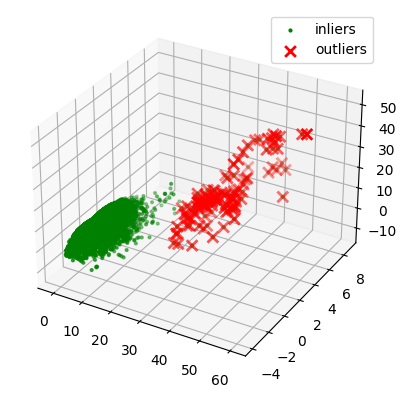

In [31]:
pca=PCA(n_components=3)
scaler=StandardScaler()
# normalize the metrics 

X=scaler.fit_transform(train_df)
X_reduce=pca.fit_transform(X)
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points 
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, 
           lw=1, label='inliers', c='green')

# Plot x's for the ground truth outliers

anomaly_index=list(anomaly_data.index)
ax.scatter(X_reduce[anomaly_index,0],X_reduce[anomaly_index,1], X_reduce[anomaly_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

위 그림을 통해서 정상 데이터와 이상치 데이터의 특징을 알 수 있습니다.

# Stage6

제조업이나 신용 데이터에서는 라벨이 있는 데이터를 얻기가 어렵습니다. 보통 라벨이 있는 데이터를 얻어서 분류모델을 쉽게 만들 수 있지만

현업에서는 라벨이 있는 데이터를 얻기에는 비용이 너무 많이 듭니다. 그래서 이번 프로젝트처럼 train data에서 라벨이 없는 상태에서도 

비지도 기반 이상치 탐지기법 Isolation Forest 모형으로 train data의 y label이 없는 상태에서도 이상치를 잘 탐지할 수 있었습니다.

# Submit

In [32]:
preds=model.predict(test_df.to_numpy())
submit=pd.read_csv('/home/iai/heo/credit/sample_submission.csv')
submit['Class']=preds 
submit.to_csv('submit_2.csv',index=False)

/home/iai/anaconda3/envs/hjb/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [33]:
%pwd

'/home/iai/heo'

In [34]:
submit['Class'].value_counts()

 1    142310
-1       193
Name: Class, dtype: int64